In [1]:
from sklearn.cluster import KMeans

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

In [2]:
x = pd.read_csv("Mall_Customers.csv")

In [3]:
x.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
x = x.filter(["Annual Income (k$)", "Spending Score (1-100)"], axis = 1)

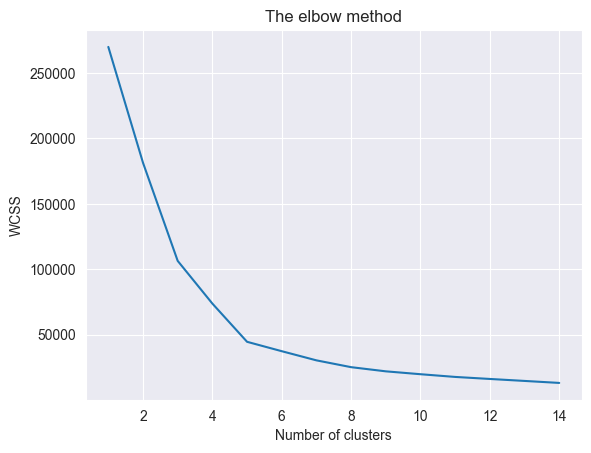

In [5]:
wcss = []

for i in range (1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

#Melakukan plot untuk hasil sehingga bisa melakukan observasi terhadap elbow
plt.plot(range(1,15), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #WCSS = within cluster sum of squares
plt.show()

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

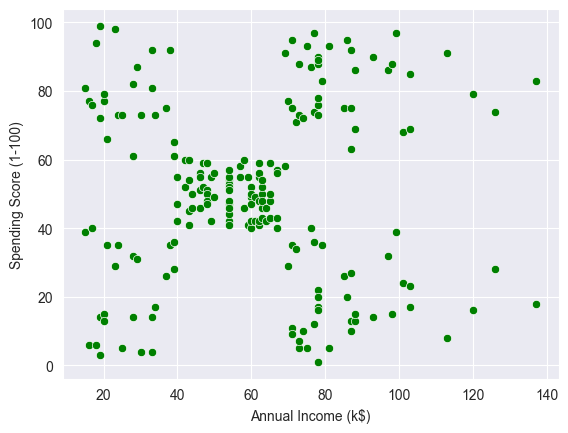

In [6]:
sns.scatterplot(data = x, x="Annual Income (k$)", y="Spending Score (1-100)", c = ["green"])

In [7]:
model = KMeans(n_clusters=5)
model.fit(x)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [8]:
print(model.cluster_centers_)

[[86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [88.2        17.11428571]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

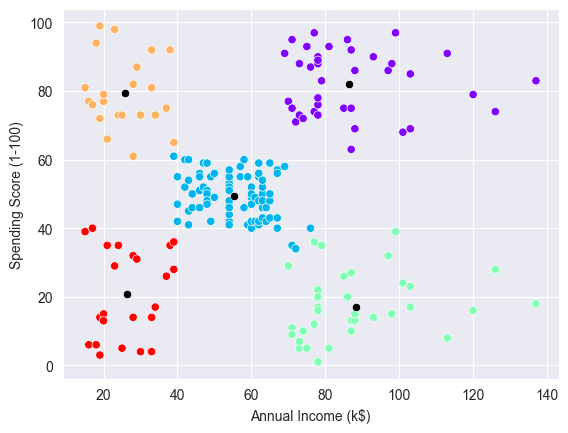

In [9]:
sns.scatterplot (data = x, x="Annual Income (k$)", y="Spending Score (1-100)",  c=model.labels_, cmap = 'rainbow')
sns.scatterplot(x=model.cluster_centers_[:, 0], y=model.cluster_centers_[:, 1], c=['black'])